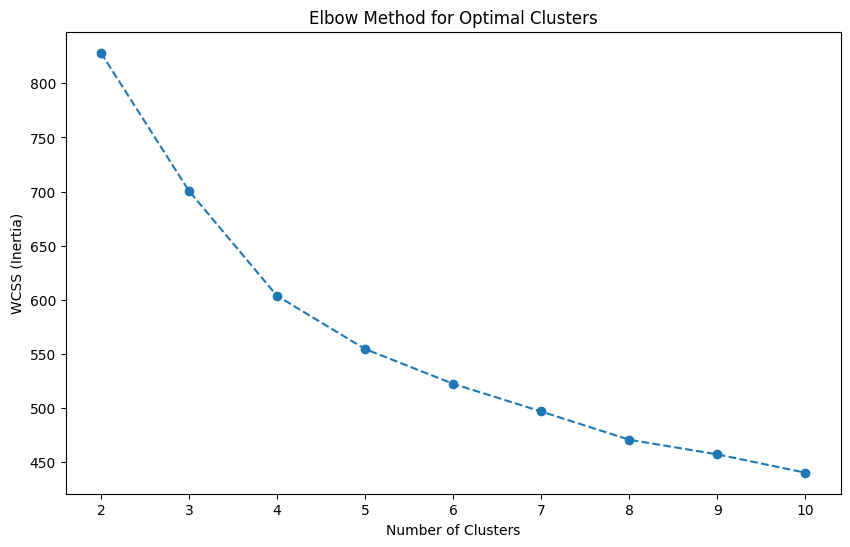

DB Index: 1.47
Silhouette Score: 0.20


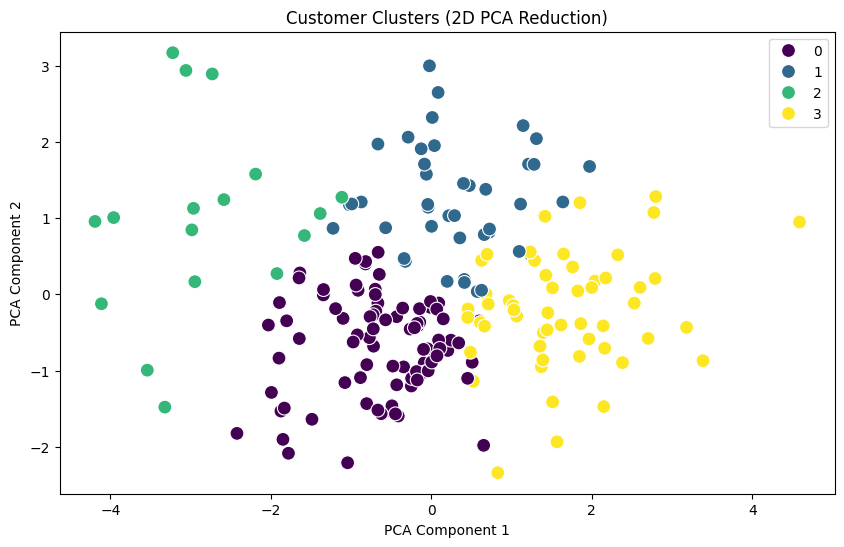


=== Cluster Summary ===
   Cluster   TotalSpent  Frequency     Recency FavoriteCategory         Region
0        0  2361.122558   4.441860   84.034884       Home Decor  South America
1        1  3996.229762   4.142857  113.428571      Electronics         Europe
2        2  1070.562353   1.764706  274.176471       Home Decor           Asia
3        3  5572.181667   7.666667   76.388889            Books  South America


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Load preprocessed customer features from Task 2
customer_features = pd.read_csv("customer_features.csv")  # Saved from Task 2
processed_features = pd.read_csv("processed_features.csv")  # Saved from preprocessing

# Determine Optimal Clusters (Elbow Method)
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(processed_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Fit Final Model (Choose n_clusters=4 based on Elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(processed_features)

# Metrics
db_score = davies_bouldin_score(processed_features, clusters)
silhouette = silhouette_score(processed_features, clusters)
print(f"DB Index: {db_score:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

# Visualize Clusters (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(processed_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=clusters, palette='viridis', s=100)
plt.title('Customer Clusters (2D PCA Reduction)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Cluster Interpretation
customer_features['Cluster'] = clusters
cluster_summary = customer_features.groupby('Cluster').agg({
    'TotalSpent': 'mean',
    'Frequency': 'mean',
    'Recency': 'mean',
    'FavoriteCategory': lambda x: x.mode()[0],
    'Region': lambda x: x.mode()[0]
}).reset_index()
print("\n=== Cluster Summary ===")
print(cluster_summary)